# Desafio 1

## Parte 1: Preparación del ambiente de trabajo

Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas de álbumes.

-  Las imágenes se encuentran en una carpeta con el nombre `​album_covers​`.
-  Cada imagen tiene la siguiente nomenclatura: `​artista-nombre-​del​-album.jpg`​.

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores. Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:

-  Comencemos por incluir las librerías clásicas: `​pandas​`, `​numpy​` y `​matplotlib.pyplot`​.
-  `sklearn.cluster.KMeans`​: para extraer los principales componentes de una matriz numérica.
-  `skimage.io`​: Para poder ingresar y leer imágenes.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io as sio
import os
import seaborn as sns


## Parte 2: Importación de imágenes
- Comencemos por ingresar una imagen a nuestro ambiente de trabajo. Para ello ocuparemos `​io.imread`​. ¿Qué devuelve?
- Para visualizar la imagen en el notebook, ocupe ​`io.imshow`


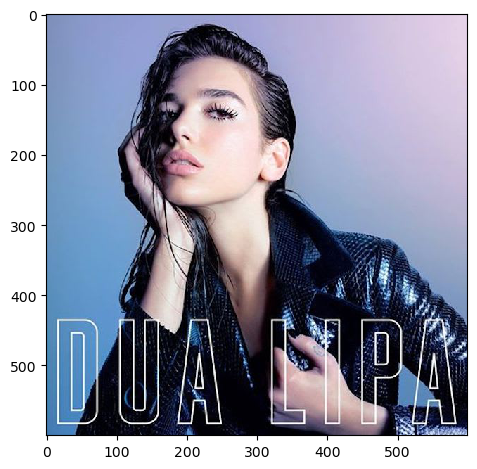

In [29]:
imfol  = './album_covers/'
images = os.listdir(imfol)
path   = './album_covers/dua-lipa-self-titled.jpeg'
img    = sio.imread(path)
sio.imshow(img)


## Parte 3: Preprocesamiento de imágenes y KMeans

-  Con la representación numérica de la imagen, vamos a extraer la altura, el ancho y la cantidad de canales mediante `​shape​`.
-  Posteriormente redimensionaremos la imagen con reshape.
-  Partamos por inicializar nuestro algoritmo `​KMeans​` con un `​k=​8`​, ¿Qué significa esto?
-  Vuelva a implementar el mismo algoritmo con `​MiniBatchKMeans​`. ¿Qué diferencia existe con `​KMeans​`?


In [30]:
img2 = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
# plt.imshow(img2)

In [31]:
kmeans = KMeans(n_clusters=8,random_state=501, n_init='auto')
mkmeans = MiniBatchKMeans(n_clusters=8,random_state=501, n_init='auto')
kmeans.fit_predict(img2);
mkmeans.fit_predict(img2);


c:\Users\investigator\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1966: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Minibatchkmeans process just a batch of the data from the dataframe and kmeans process all the data.


## Parte 4: Extracción de valores

- Ahora extraemos las etiquetas predichas con `​labels_​`. Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en estos, debemos extraer los valores de los centroides.
- Para extraer los centroides (valores característicos), utilizamos el atributo `cluster_centers_`​.
- Con las etiquetas, generamos un conteo de ocurrencia con `​np.unique`​. Para extraer el conteo, debemos implementar la opción `​return_counts=​True`​.


In [32]:
k_labels     = kmeans.labels_
mk_labels    = mkmeans.labels_
kcentroids   = kmeans.cluster_centers_
mkcentroids  = mkmeans.cluster_centers_
print('kmeans number of labels', len(k_labels))
print('mini-batch-kmeans number of labels', len(mk_labels))
print('kmeans centroid centers', len(kcentroids))
print('mini-batch-kmeans centroid centers', len(mkcentroids))
kuniquelabels , kcount  = np.unique(k_labels,return_counts=True)
mkuniquelabels , mkcount = np.unique(mk_labels,return_counts=True)
print('centroid shape', kcentroids.shape)

kmeans number of labels 360000
mini-batch-kmeans number of labels 360000
kmeans centroid centers 8
mini-batch-kmeans centroid centers 8
centroid shape (8, 3)



## Parte 5: Conversión rgb a hex
- Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con `​map​` por cada centroide.


In [33]:
def rgb_to_hex(r, g, b):
    return '#{:02x}{:02x}{:02x}'.format(int(r), int(g), int(b))
hex = list(map(rgb_to_hex,   kcentroids[:,0],kcentroids[:,1],kcentroids[:,2]))




## Parte 6: Definición de base
Ahora generamos un DataFrame con las siguientes variables:

-  El color `​hex​`.
-  La ocurrencia del color en cada pixel `​count​`.
-  El porcentaje de ocurrencia de cada color respecto a `​cluster_centers_​`.
  
Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.


In [34]:
df2               = pd.DataFrame()
df2['hex']        = hex
df2['count']      = kcount
df2['percentage'] = kcount/df2['count'].sum()
df2


,hex,count,percentage
0,#807585,16066,0.044628
1,#050511,76586,0.212739
2,#b2b3d5,64075,0.177986
3,#7799c6,82174,0.228261
4,#494960,19181,0.053281
5,#c6a9aa,19368,0.053800
6,#e4d5dc,54425,0.151181
7,#1c2037,28125,0.078125



## Parte 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar coloreadas con el color inferido.

Bonus point: Envuelva todo en una función

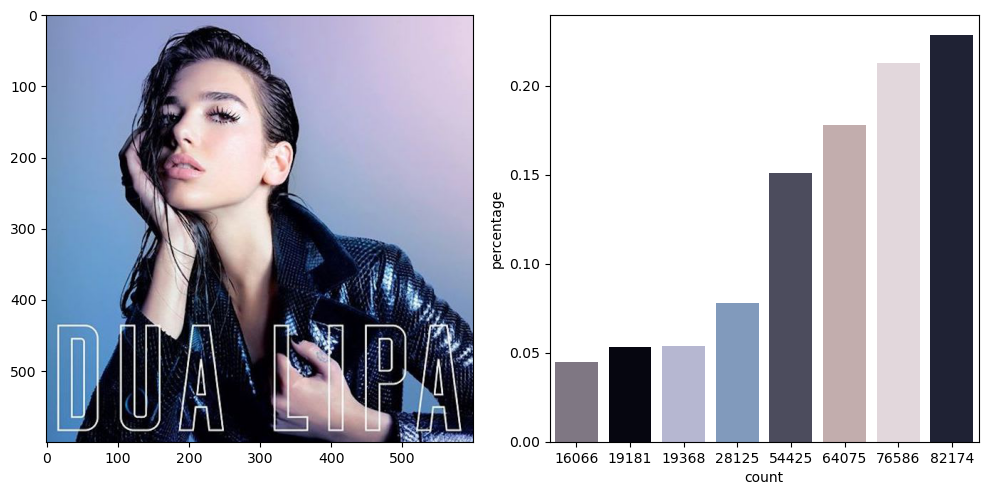

In [36]:
fig, ax= plt.subplots(ncols=2,figsize=(10,5))
ax[0].imshow(img)
sns.barplot(data=df2,x='count',y='percentage',palette=df2['hex'], ax=ax[1]);
plt.tight_layout()

